The purpose of this study is to propose a prediction model for 30-day unplanned readmission among diabetes patients in US hospitals. The analysis will be based on risk factors such as a patient’s demographics, admission details, diagnosis, and medical data. In a broader sense, the goal of the study is to allow health centers to better anticipate and address unplanned readmissions while improving their quality of care and cost efficiency.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder, OneHotEncoder, MinMaxScaler
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Import dataset

In [2]:
df = pd.read_csv('C:/Users/Arvind Sain/Downloads/dataset_diabetes/dataset_diabetes/diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


Data exploration and Cleaning

In [3]:
df.shape


(101766, 50)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
#There are 50 features in this data. It conatins numerical values(int) and categorical values(object).

#There are 101766 samples present in this dataset. There seem to be no null values.We will dig deep and find out more.

In [6]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


There are 50 features looking into all of these.

1. encounter_id : unique identifier of an encounter

In [7]:
df['encounter_id'].nunique()


101766

All the patients that have come to the hospital have been provided with an encounter_id so that is why there are 101766 different unique values.

1. patient_nbr : unique identifier of a patient

In [8]:
df['patient_nbr'].nunique()


71518

There are 71518 unique paitents that have entered the system.



encounter_id and patient_nbr: these are just identifiers and not useful variables so they can be dropped


In [9]:
df = df.drop(columns=['encounter_id', 'patient_nbr'])

1. race : It is a categorical variable.

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


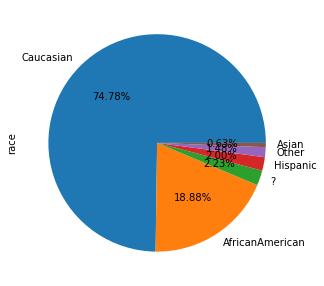

In [10]:
print(df['race'].value_counts())
df['race'].value_counts().plot(kind='pie',autopct='%.2f%%',figsize=(15,5))
plt.show()

There are 5 distinct categories under race feature. There are some unknown values here entered in the form of '?' which needs to be treated.


In [11]:
df['race'] = df['race'].replace('?',np.nan)
df['race'].isna().sum()*100/df.shape[0]
# Only 2.3 % of null values in column 'race'

2.2335554114340743

In [12]:
df.shape[0]

101766

For null value filling we tried replacing with mode,substituing according to the prob distribution,dropping null values but dropping the null values seemed to get the best results.


In [13]:
df = df.dropna()

In [14]:
df.shape

(99493, 48)

1. gender: It is a categorical feature depicting the gender of the patient.


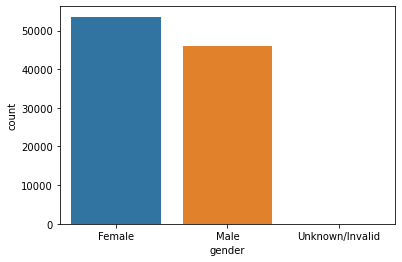

Female             53575
Male               45917
Unknown/Invalid        1
Name: gender, dtype: int64


In [15]:
sns.countplot(df.gender)
plt.show()
print(df.gender.value_counts())

There are 2 categories here: female, male. There is a 3rd category of unknown/invalid which are missing/unknown values which only have 1 value hence they can be dropped.

In [16]:
df = df[df['gender'] != 'Unknown/Invalid']

In [17]:
#encoding gender
df['gender'] = df['gender'].replace({'Female' : 0, 'Male' : 1})

Age: It is a categorical feature as the age is grouped here in bins of 10 yrs


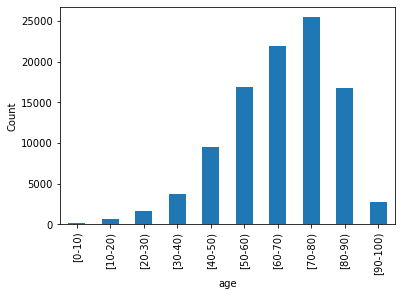

In [18]:
# check 'age' feature
df.groupby('age').size().plot(kind='bar')
plt.ylabel('Count')
plt.show()

The age here range from 0 to 100 yrs.

The population falling in the range of 50 to 90 yrs are mostly present in this dataset.

Converting age into numerical value, the various ways tried:

replacing each of the range with the min value

replacing each of the range with the max value

replacing each of the range with the mid values

created 5 Categories (0-20) (20-40) (40-60) (60-90) (90-100) then replacing with min,max,mid values

3 Categories (0-40) (40-90) (90-100) then replacing with min,max,mid values

3 Categories (0-50) (50-90) (90-100) then replacing with min,max,mid values

4 Categories According to Age Range - Child (0-10), Teen (10-20), Adult (20-60), Old (60-100) then replacing with min,max,mid values

3 Categories According to Age Range - Young (0-20), Adult (20-60), Old (60-100) then replacing with min,max,mid values

5 Categories According to Readmission Rate A,B,C,D,E :

                      '[0-10)' : 'A',
                      '[10-20)' : 'A',
                      '[20-30)' : 'B',
                      '[30-40)' : 'B',
                      '[40-50)' : 'C',
                      '[50-60)' : 'C',
                      '[60-70)' : 'D',
                      '[70-80)' : 'E',
                      '[80-90)' : 'D',
                      '[90-100)' : 'B'
                      
Treating age column by taking the middle value

In [19]:
#Age
# Modify age column
df['age'] = df['age'].map({'[70-80)': 75,
                                       '[60-70)': 65,
                                       '[80-90)': 85,
                                       '[50-60)': 55,
                                       '[40-50)':45,
                                       '[30-40)': 35,
                                       '[90-100)':95,
                                       '[20-30)':25,
                                       '[10-20)':15,
                                       '[0-10)': 5})
df['age'].value_counts()

75    25468
65    21988
55    16895
85    16800
45     9465
35     3699
95     2724
25     1611
15      682
5       160
Name: age, dtype: int64

1. Weight : weight in pounds.


In [20]:
df.weight.value_counts(1)*100


?            96.925381
[75-100)      1.285530
[50-75)       0.865396
[100-125)     0.599043
[125-150)     0.136694
[25-50)       0.093475
[0-25)        0.047240
[150-175)     0.034174
[175-200)     0.010051
>200          0.003015
Name: weight, dtype: float64

Weight is also divided into bins of 25 pounds, but 96.9% part of the weight has unknown values. So we can drop this column.



In [21]:
df.drop(['weight'],axis=1,inplace=True)


1.admission_type_id : Integer identifier corresponding to 8 distinct values, for example, emergency, urgent, elective, newborn, and not available


In [22]:
df.admission_type_id.nunique()


8

There are 8 unique values ranging from 1 to 8. These 8 values correspond to :

1 Emergency

2 Urgent

3 Elective

4 Newborn

5 Not Available

6 NULL

7 Trauma Center

8 Not Mapped

For further analysis we can merger these categories into less number of categories.

Emeregncy/Urgent/Trauma Center ---> Emergency

Not Available/Null/Not Mapped ---> Not Available

Elective ---> Elective

New Born ---> New Born

In [23]:
df['admission_type_id']=df['admission_type_id'].replace({1:'Emergency',2:'Emergency',7:'Emergency',
                                 5:'Not Available', 6:'Not Available', 8:'Not Available',
                                 3:'Elective',4:'Newborn'})

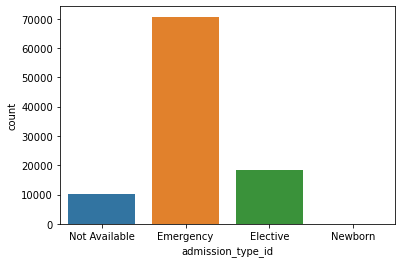

In [24]:
sns.countplot(df['admission_type_id'])
plt.show()

From this we can see that the majority patients that have been admitted in this hospital have an admission type as emergency.



In [25]:
df[df['admission_type_id']== 'Newborn'][['gender','age','admission_type_id']]


,gender,age,admission_type_id
2043,1,55,Newborn
2203,1,85,Newborn
2461,1,75,Newborn
4823,0,65,Newborn
35877,1,65,Newborn
47548,1,45,Newborn
48711,0,75,Newborn
80354,0,5,Newborn
87714,1,65,Newborn
100721,1,85,Newborn


Droppping the category new born because the admission_type_id == newborn and the age and gender corresponding to it gives contradictory information.



In [26]:
df=df[df['admission_type_id']!='Newborn']


In [27]:
df.admission_type_id.value_counts()


Emergency        70706
Elective         18507
Not Available    10269
Name: admission_type_id, dtype: int64

1. Discharge disposition: Integer identifier corresponding to 26 distinct values, for example, discharged to home, expired, and not available


discharge_disposition_id description

1 Discharged to home

2 Discharged/transferred to another short term hospital

3 Discharged/transferred to SNF(skilled nursing facility)

4 Discharged/transferred to ICF(intermediate care facility)

5 Discharged/transferred to another type of inpatient care institution

6 Discharged/transferred to home with home health service

7 Left AMA(Against Medical Advice.)

8 Discharged/transferred to home under care of Home IV provider

9 Admitted as an inpatient to this hospital

10 Neonate discharged to another hospital for neonatal aftercare

11 Expired

12 Still patient or expected to return for outpatient services

13 Hospice / home

14 Hospice / medical facility

15 Discharged/transferred within this institution to Medicare approved swing bed

16 Discharged/transferred/referred another institution for outpatient services

17 Discharged/transferred/referred to this institution for outpatient services

18 NULL

19 Expired at home. Medicaid only, hospice.

20 Expired in a medical facility. Medicaid only, hospice.

21 Expired, place unknown. Medicaid only, hospice.

22 Discharged/transferred to another rehab fac including rehab units of a hospital .

23 Discharged/transferred to a long term care hospital.

24 Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.

25 Not Mapped

26 Unknown/Invalid

30 Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere

27 Discharged/transferred to a federal health care facility.

28 Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital

29 Discharged/transferred to a Critical Access Hospital (CAH).

We can merge several grps over here to reduce the number of categories:
    
1 ---> Discharged to home

2/3/4/5/10/16/22/23/24/30/27/28/29 ---> Transferred to another medical facility

7 ---> Left AMA(Against Medical Advice.)

6/8 ---> Discharged to home with home health service

9/12/15/17 ---> Still patient/referred to this institution

11/19/20/21 ---> Expired

18/25/26 ---> Not Available

13/14 ---> Hospice

In [28]:
df['discharge_disposition_id']=df['discharge_disposition_id'].replace({1:'Discharged to home',
                                        2:'Transferred to another medical facility',
                                        3:'Transferred to another medical facility',
                                        4:'Transferred to another medical facility',
                                        5:'Transferred to another medical facility',
                                        16:'Transferred to another medical facility',
                                        22:'Transferred to another medical facility',
                                        23:'Transferred to another medical facility',
                                        24:'Transferred to another medical facility',
                                        27:'Transferred to another medical facility',
                                        28:'Transferred to another medical facility',
                                        29:'Transferred to another medical facility',
                                        30:'Transferred to another medical facility',                            
                                        6:'Discharged to home with home health service',
                                        8:'Discharged to home with home health service',
                                        7:'Left AMA',
                                        9:'Still patient/referred to this institution',
                                        12:'Still patient/referred to this institution',
                                        15:'Still patient/referred to this institution',
                                        17:'Still patient/referred to this institution',
                                        10:'Neonate discharged',
                                        11:'Expired',
                                        19:'Expired',
                                        20:'Expired',
                                        21:'Expired',
                                        13:'Hospice',
                                        14:'Hospice',
                                        18:'Not Available',
                                        25:'Not Available',
                                        26:'Not Available'})

In [29]:
df.discharge_disposition_id.value_counts()


Discharged to home                             58761
Transferred to another medical facility        20172
Discharged to home with home health service    12801
Not Available                                   4646
Expired                                         1618
Hospice                                          766
Left AMA                                         611
Still patient/referred to this institution       101
Neonate discharged                                 6
Name: discharge_disposition_id, dtype: int64

The patients who have expired should be removed from the system beacuse they will create bias as they will not be readmitted.



In [30]:
df=df[df['discharge_disposition_id']!='Expired']
df=df[df['discharge_disposition_id']!='Neonate discharged']
df=df[df['discharge_disposition_id']!='Hospice']

1. admission_source_id: Integer identifier corresponding to 17 distinct values, for example, physician referral, emergency room, and transfer from a hospital


In [31]:
df.admission_source_id.value_counts(sort=False)


1     28456
2      1021
3       185
4      2918
5       800
6      1964
7     55007
8        15
9        54
10        7
11        2
13        1
14        1
17     6489
20      158
22       12
25        2
Name: admission_source_id, dtype: int64

1 Physician Referral

2 Clinic Referral

3 HMO Referral(Health Maintenance Organization)

4 Transfer from a hospital

5 Transfer from a Skilled Nursing Facility (SNF)

6 Transfer from another health care facility

7 Emergency Room

8 Court/Law Enforcement

9 Not Available

10 Transfer from critial access hospital

11 Normal Delivery

12 Premature Delivery

13 Sick Baby

14 Extramural Birth

15 Not Available

17 NULL

18 Transfer From Another Home Health Agency

19 Readmission to Same Home Health Agency

20 Not Mapped

21 Unknown/Invalid

22 Transfer from hospital inpt/same fac reslt in a sep claim

23 Born inside this hospital

24 Born outside this hospital

25 Transfer from Ambulatory Surgery Center

26 Transfer from Hospice

We can merge several grps over here to reduce the number of categories:
1/2/3 ---> Referral

4/5/6/10/18/19/25/26/22 ---> Transferred from another health care facility

7 ---> Emergency

9/15/17/20/21 ---> Not Available

8 ---> Court/Law Enforcement

Delivery ---> 11/12/14/13/23/24

In [32]:
df['admission_source_id']=df['admission_source_id'].replace({1:'Referral',
                                   2:'Referral',
                                   3:'Referral',
                                   4:'Transferred from another health care facility',
                                   5:'Transferred from another health care facility',
                                   6:'Transferred from another health care facility',
                                   8:'Emergency',                                    
                                   10:'Transferred from another health care facility',
                                   18:'Transferred from another health care facility',
                                   19:'Transferred from another health care facility',
                                   25:'Transferred from another health care facility',
                                   26:'Transferred from another health care facility',
                                   7:'Emergency',
                                   9:'Not Available',
                                   15:'Not Available',
                                   17:'Not Available',
                                   20:'Not Available',
                                   21:'Not Available',
                                   11:'Delivery',
                                   12:'Delivery',
                                   13:'Delivery',
                                   14:'Delivery',
                                   23:'Delivery',
                                   22:"Transferred from another health care facility",                                    
                                   24:'Delivery'})

In [33]:
df.admission_source_id.value_counts()


Emergency                                        55022
Referral                                         29662
Not Available                                     6701
Transferred from another health care facility     5703
Delivery                                             4
Name: admission_source_id, dtype: int64

In [34]:
df[df['admission_source_id']=='Delivery'][['gender','age','admission_source_id']]


,gender,age,admission_source_id
83432,0,75,Delivery
83510,0,25,Delivery
85588,0,75,Delivery
97384,1,75,Delivery


Droppping the category delivery because the admission_source_id == delivery and the age corresponding to it give contradictory information.



In [35]:
df=df[df['admission_source_id']!='Delivery']


Since we have 2 columns regarding admission, type_id and source_id, we used this information to fill the ‘Not Available’ values in admssion_source_id columns with respect to the admission_type_id. For example, if admission_type_id is Emergency but admission_source_id is Not Available, we can fill Emergency(mode) in that place.

After filling it admission_type_id column was dropped since it was giving the same information as admission_source_id and was less significant statistically.

In [36]:
df = df.reset_index(drop = True )


In [37]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,0,5,Not Available,Not Available,Referral,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,0,15,Emergency,Discharged to home,Emergency,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,0,25,Emergency,Discharged to home,Emergency,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,1,35,Emergency,Discharged to home,Emergency,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,1,45,Emergency,Discharged to home,Emergency,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [38]:
# Before
df[df['admission_type_id']=='Emergency']['admission_source_id'].value_counts()

Emergency                                        52268
Referral                                         11094
Transferred from another health care facility     4422
Not Available                                      981
Name: admission_source_id, dtype: int64

In [39]:
for i in range(df.shape[0]):
    if df.loc[i, 'admission_source_id'] == 'Not Available' and df.loc[i, 'admission_type_id'] == 'Emergency':
        df.loc[i, 'admission_source_id'] = 'Emergency'

In [40]:
# After
df[df['admission_type_id']=='Emergency']['admission_source_id'].value_counts()

Emergency                                        53249
Referral                                         11094
Transferred from another health care facility     4422
Name: admission_source_id, dtype: int64

In [41]:
# Before
df[df['admission_type_id']=='Elective']['admission_source_id'].value_counts()

Referral                                         16128
Transferred from another health care facility     1211
Emergency                                          912
Not Available                                       59
Name: admission_source_id, dtype: int64

In [42]:
for i in range(df.shape[0]):
    if df.loc[i, 'admission_source_id'] == 'Not Available' and df.loc[i, 'admission_type_id'] == 'Elective':
        df.loc[i, 'admission_source_id'] = 'Referral'

In [43]:
# After
df[df['admission_type_id']=='Elective']['admission_source_id'].value_counts()

Referral                                         16187
Transferred from another health care facility     1211
Emergency                                          912
Name: admission_source_id, dtype: int64

1. Time in hospital: Integer number of days between admission and discharge


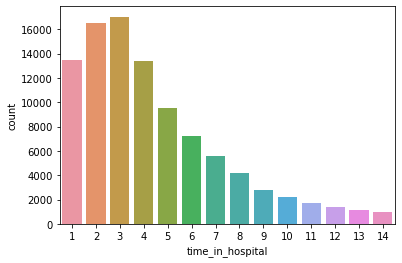

In [44]:
sns.countplot(df.time_in_hospital)
plt.show()

The time in the hospital ranges from 1 day to 14 days.

1.payer_code : Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical

In [45]:
df.payer_code.value_counts(1)*100


?     40.020394
MC    31.427159
HM     6.230430
SP     4.843029
BC     4.621580
MD     3.475198
CP     2.468894
UN     2.314395
CM     1.916818
OG     1.033083
PO     0.599456
DM     0.545897
CH     0.144199
WC     0.128749
OT     0.094759
MP     0.079309
SI     0.056650
Name: payer_code, dtype: float64

Payer code has a significant number (approx. 40% )of missing values and it are not signification w.r.t the patient readmission so we can drop it.



In [46]:
df.drop(['payer_code'],axis=1,inplace=True)


1.medical_specialty: Integer identifier of a specialty of the admitting physician, corresponding to 73 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon

In [47]:
df.medical_specialty.nunique()


73

In [48]:
df.medical_specialty.value_counts(1)*100


?                                       48.869067
InternalMedicine                        14.215969
Emergency/Trauma                         7.616801
Family/GeneralPractice                   7.296473
Cardiology                               5.330216
Surgery-General                          3.092040
Nephrology                               1.564560
Orthopedics                              1.410061
Orthopedics-Reconstructive               1.222602
Radiologist                              1.130933
Psychiatry                               0.852835
Pulmonology                              0.847685
Urology                                  0.687006
ObstetricsandGynecology                  0.666406
Surgery-Cardiovascular/Thoracic          0.637566
Gastroenterology                         0.550016
Surgery-Vascular                         0.540747
Surgery-Neuro                            0.462467
PhysicalMedicineandRehabilitation        0.393457
Oncology                                 0.327538


There are 73 unique values here and a 48.8% of values are missing ('?') hence we drop this column.



In [49]:
df.drop(['medical_specialty'],axis=1,inplace=True)


1.num_lab_procedures: Number of lab tests performed during the encounter


In [50]:
print('The number of lab tests a patient has undergone can range from',df.num_lab_procedures.min(),'to',df.num_lab_procedures.max())


The number of lab tests a patient has undergone can range from 1 to 132


1.num_procedures: Number of procedures(other than lab tests) performed during the encounter


In [51]:
df.num_procedures.value_counts()


0    44532
1    19843
2    12140
3     9032
6     4675
4     3970
5     2896
Name: num_procedures, dtype: int64

No of procedures range from 0 to 5

1.num_medications: Number of distinct generic names administered during the encounter

In [52]:
print('The number of medications range from a minimum of',df.num_medications.min(),'to maximum of',df.num_medications.max())


The number of medications range from a minimum of 1 to maximum of 81


number_outpatient: Number of outpatient visits of the patient in the year preceding the encounter

number_emergency : Number of emergency visits of the patient in the year preceding the encounter

number_inpatient: Number of inpatient visits of the patient in the year preceding the encounter

Diagnosis1: The primary diagnosis(coded as first three digits of ICD9)

Diagnosis2: Secondary diagnosis(coded as first three digits of ICD9)

Diagnosis3: Additional secondary diagnosis(coded as first three digits of ICD9)

In [53]:
df = df.reset_index(drop = True )


In [54]:
diag_cols = ['diag_1','diag_2','diag_3']


In [55]:
ord('E'), ord('V')


(69, 86)

In [56]:
for i in diag_cols:
    for j in range(len(df[i])):
        if str(df.loc[j, i])[:3] == '250':
            df.loc[j, i] = 'Diabetes'
        elif ord(str(df.loc[j, i])[0]) in range(69, 87):
            df.loc[j, i] = 'External causes of injury'
        elif df.loc[j, i] == '?':
            df.loc[j, i] = 'Missing'
        else:
            x = float(df.loc[j, i])
            if x in range(390, 460) or x == 785:
                df.loc[j, i] = 'Circulatory'
            elif x in range(460, 520) or x == 786:
                df.loc[j, i] = 'Respiratory'
            elif x in range(520, 580) or x == 787:
                df.loc[j, i] = 'Digestive'
            elif x in range(800, 1000):
                df.loc[j, i] = 'Injury and Poisoning'
            elif x in range(710, 740):
                df.loc[j, i] = 'Musculoskeletal System and Connective Tissue'
            elif x in range(580, 630) or x == 788:
                df.loc[j, i] = 'Genitourinary'
            elif x in range(140, 230):
                df.loc[j, i] = 'Neoplasms'
            elif x in [780, 781, 784] or x in range(790, 800):
                df.loc[j, i] = 'Other Symptoms'
            elif x in range(240, 280):
                df.loc[j, i] = 'Endocrine, Nutritional, Metabolic, Immunity'
            elif x in range(680, 710) or x == 782:
                df.loc[j, i] = 'Skin and Subcutaneous Tissue'
            elif x in range(1, 140):
                df.loc[j, i] = 'Infectious and Parasitic'
            elif x in range(290, 320):
                df.loc[j, i] = 'Mental Disorders'
            elif x in range(280, 290):
                df.loc[j, i] = 'Blood and Blood-Forming Organs'
            elif x in range(320, 360):
                df.loc[j, i] = 'Nervous'
            elif x in range(630, 680):
                df.loc[j, i] = 'Pregnancy, Childbirth'
            elif x in range(360, 390):
                df.loc[j, i] = 'Sense Organs'
            else:
                df.loc[j, i] = 'Congenital Anomalies'

In [57]:
for i in range(len(df['diag_2'])):
    if df.loc[i, 'diag_2'] == 'Missing':
        if df.loc[i, 'diag_1'] != 'Missing':
            df.loc[i, 'diag_2'] = 'Not Required'

In [58]:
for i in range(len(df['diag_3'])):
    if df.loc[i, 'diag_3'] == 'Missing':
        if df.loc[i, 'diag_2'] == 'Not Required' or df.loc[i, 'diag_2'] != 'Missing':
            df.loc[i, 'diag_3'] = 'Not Required'

In [59]:
df1 = pd.DataFrame(df['diag_1'].value_counts())
df2 = df1.merge(pd.DataFrame(df['diag_2'].value_counts()), how = 'outer', left_index = True, right_index = True)
df2.merge(pd.DataFrame(df['diag_3'].value_counts()), how = 'outer', left_index = True, right_index = True)

,diag_1,diag_2,diag_3
Blood and Blood-Forming Organs,1078.0,2801.0,2402.0
Circulatory,29004.0,30465.0,28956.0
Congenital Anomalies,791.0,478.0,467.0
Diabetes,8471.0,12392.0,16540.0
Digestive,9154.0,3994.0,3781.0
"Endocrine, Nutritional, Metabolic, Immunity",2553.0,7899.0,8726.0
External causes of injury,1595.0,2484.0,4938.0
Genitourinary,4912.0,8002.0,6289.0
Infectious and Parasitic,2487.0,1816.0,1773.0
Injury and Poisoning,6699.0,2302.0,1846.0


In [60]:
len(df[df['diag_1'] == 'Missing'])


18

In [61]:
#dropping any missing values present in diag_1.
df = df[df['diag_1'] != 'Missing']

1.number_diagnoses: Number of diagnoses entered to the system

<AxesSubplot:xlabel='number_diagnoses', ylabel='count'>

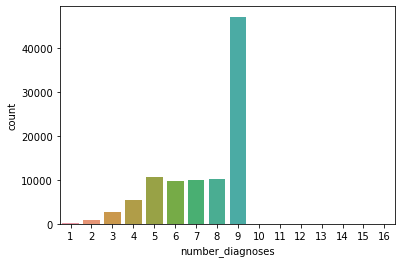

In [62]:
sns.countplot(df.number_diagnoses)


The number of diagonses entered into the system range from 1 to 16.

1. max_glu_serum: Indicates the range of the result or if the test was not taken.
    
Values:“>200,”“>300,” “normal,”and“none” if not measured

In [63]:
df.max_glu_serum.value_counts()


None    91978
Norm     2517
>200     1397
>300     1178
Name: max_glu_serum, dtype: int64

1. A1Cresult: Indicates the range of the result or if the test was not taken.

In [64]:
df.A1Cresult.value_counts()


None    80662
>8       7881
Norm     4836
>7       3691
Name: A1Cresult, dtype: int64

Values: “>8” if the result was greater than 8%

    “>7” if the result was greater than 7% but less than 8%

    “normal” if the result was less than 7%

    “none” if not measured.

1.24 features for medications :
    
For the generic names : metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, and metformin-pioglitazone

The feature indicates whether the drug was prescribed or there was a change in the dosage.

Values: “up” if the dosage was increased during the encounter

    “down” if the dosage was decreased

    “steady” if the dosage did not change

    “no” if the drug was not prescribed

In [65]:
meds = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

for i in meds:
       print(i, df[i].unique())

metformin ['No' 'Steady' 'Up' 'Down']
repaglinide ['No' 'Up' 'Steady' 'Down']
nateglinide ['No' 'Steady' 'Down' 'Up']
chlorpropamide ['No' 'Steady' 'Down' 'Up']
glimepiride ['No' 'Steady' 'Down' 'Up']
acetohexamide ['No' 'Steady']
glipizide ['No' 'Steady' 'Up' 'Down']
glyburide ['No' 'Steady' 'Up' 'Down']
tolbutamide ['No' 'Steady']
pioglitazone ['No' 'Steady' 'Up' 'Down']
rosiglitazone ['No' 'Steady' 'Up' 'Down']
acarbose ['No' 'Steady' 'Up' 'Down']
miglitol ['No' 'Steady' 'Down' 'Up']
troglitazone ['No' 'Steady']
tolazamide ['No' 'Steady' 'Up']
examide ['No']
citoglipton ['No']
insulin ['No' 'Up' 'Steady' 'Down']
glyburide-metformin ['No' 'Steady' 'Down' 'Up']
glipizide-metformin ['No' 'Steady']
glimepiride-pioglitazone ['No' 'Steady']
metformin-rosiglitazone ['No']
metformin-pioglitazone ['No' 'Steady']


In [66]:
df.drop(['examide', 'citoglipton','metformin-rosiglitazone'], axis = 1, inplace = True)


In [67]:
meds = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone']

In [68]:
for i in meds:
    df[i] = df[i].replace({'No' : -2,
                           'Down' : -1,
                           'Steady' : 0,
                           'Up' : 1})

In [69]:
for i in meds:
    df[i] = df[i].astype('int64')

1.change : Indicates if there was a change in diabetic medications (either dosage or generic name)

In [70]:
df.change.value_counts()


No    52046
Ch    45024
Name: change, dtype: int64

In [71]:
df['change'] = df['change'].replace({'No' : 0, 'Ch' : 1})


1.diabetesMed : Indicates if there was any diabetic medication prescribed.


In [72]:
df.diabetesMed.value_counts()


Yes    74842
No     22228
Name: diabetesMed, dtype: int64

In [73]:
df['diabetesMed'] = df['diabetesMed'].replace({'Yes' : 1, 'No' : 0})


1.readmitted: Outcome variable
    
The outcome we are looking at is whether the patient gets readmitted to the hospital within 30 days or not.

In [74]:
df.readmitted.value_counts()


NO     50995
>30    34955
<30    11120
Name: readmitted, dtype: int64

The outcome actually has < 30, > 30 and No Readmission categories.So w.r.t. our problem we will convert this into 2 categories i.e No readmission or readmission with in 30 days

In [75]:
df['readmitted'] = df['readmitted'].replace('>30', 'NO')
df['readmitted']= df['readmitted'].replace( {'NO': 0, '<30': 1} ).astype(int)

In [76]:
df.reset_index(drop = True, inplace = True)


Creating New Features and Dropping Redundant Ones


1. Preceding year visits:


In [77]:
df['preceding_year_visits']=df['number_outpatient']+df['number_emergency']+df['number_inpatient']


In [78]:
# Dropping ‘number_outpatient’, ‘number_emergency’, ‘number_inpatient’
df = df.drop(columns=['number_outpatient', 'number_emergency','number_inpatient'])

2. Number of Medicines Changes


In [79]:
df['number_changes'] = np.nan
for i in range(len(df)):
    n = 0
    for j in meds:
        if df.loc[i, j] == -1 or df.loc[i, j] == 1:
            n += 1
    df.loc[i, 'number_changes'] = n

In [80]:
df['number_changes'].value_counts()


0.0    70599
1.0    25081
2.0     1279
3.0      106
4.0        5
Name: number_changes, dtype: int64

3. Number of diabetic medicine

In [81]:
df['number_diab_meds'] = np.nan
for i in range(len(df)):
    n = 0
    for j in meds:
        if df.loc[i, j] != -2:
            n += 1
    df.loc[i, 'number_diab_meds'] = n
df.number_diab_meds=df.number_diab_meds.astype('int64')
df['number_diab_meds'].value_counts()

1    44940
0    22228
2    21038
3     7504
4     1298
5       57
6        5
Name: number_diab_meds, dtype: int64

4. Insulin_treatment


In [82]:
df['insulin_treatment'] = np.nan


In [83]:
for i in range(len(df)):
    if df.loc[i, 'insulin'] != -2 and df.loc[i, 'number_diab_meds'] == 1:
        df.loc[i, 'insulin_treatment'] = 'insulin_only'
    elif df.loc[i, 'insulin'] != -2 and df.loc[i, 'number_diab_meds'] > 1:
        df.loc[i, 'insulin_treatment'] = 'insulin_combo'
    elif df.loc[i, 'insulin'] == -2 and df.loc[i, 'number_diab_meds'] == 0:
        df.loc[i, 'insulin_treatment'] = 'no_med'
    else:
        df.loc[i, 'insulin_treatment'] = 'other_meds'
df['insulin_treatment'].value_counts()

insulin_only     29118
other_meds       23259
insulin_combo    22465
no_med           22228
Name: insulin_treatment, dtype: int64

In [84]:
# number_diab_meds was inly created to make the column insulin treatment, Hence we drop it
df=df.drop('number_diab_meds',1)
df.reset_index(drop = True, inplace = True)

Statistical tests


In [85]:
# Numerical features
num_cols = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
            'number_diagnoses','preceding_year_visits', 'number_changes']

In [86]:
# Categorical features
cat_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
            'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 
            'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
            'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
            'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
            'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 
            'change', 'diabetesMed', 'insulin_treatment']

In [87]:
df.shape

(97070, 42)

In [88]:
len(num_cols)+len(cat_cols)

42

Chi Square for categorical v/s categorical and one way anova for categorical v/s numerical

To see if the features are significant w.r.t to the target variable (readmitted)

In [89]:
#Statistical Tests (Chi Square and Anova)

p_val = []
sig = []
for i in df.columns:
    if i in num_cols:
        stat, p = stats.f_oneway(df[df['readmitted'] == 0][i], df[df['readmitted'] == 1][i])
    else:
        ct = pd.crosstab(df[i], df['readmitted'])
        stat, p, dof, exp = stats.chi2_contingency(ct)
    p_val.append(p)
    if p < 0.05:
        sig.append('Significant')
    else:
        sig.append("Insignificant")
stats_df = pd.DataFrame({"columns" : df.columns, "p_value" : p_val, "significance" : sig})

stats_df.sort_values(by='p_value',ascending = True)

,columns,p_value,significance
39,preceding_year_visits,0.000000e+00,Significant
38,readmitted,0.000000e+00,Significant
4,discharge_disposition_id,1.002865e-175,Significant
13,number_diagnoses,1.181113e-62,Significant
6,time_in_hospital,6.893070e-49,Significant
31,insulin,1.450024e-43,Significant
9,num_medications,1.128847e-39,Significant
41,insulin_treatment,1.750135e-39,Significant
40,number_changes,3.627420e-30,Significant
12,diag_3,5.426864e-30,Significant


In [90]:
sig_cols = stats_df[stats_df['significance'] == 'Significant']['columns'].reset_index(drop = True)
insig_cols = stats_df[stats_df['significance'] == 'Insignificant']['columns'].reset_index(drop = True)
print('Statiscally significant features are :','\n')
print(sig_cols)

Statiscally significant features are : 

0                          age
1            admission_type_id
2     discharge_disposition_id
3          admission_source_id
4             time_in_hospital
5           num_lab_procedures
6               num_procedures
7              num_medications
8                       diag_1
9                       diag_2
10                      diag_3
11            number_diagnoses
12               max_glu_serum
13                   A1Cresult
14                   metformin
15                 repaglinide
16                 glimepiride
17                   glipizide
18                pioglitazone
19                     insulin
20                      change
21                 diabetesMed
22                  readmitted
23       preceding_year_visits
24              number_changes
25           insulin_treatment
Name: columns, dtype: object


In [91]:
#statistically insignificant meds

insignificant_meds = ['nateglinide','chlorpropamide','acetohexamide','tolbutamide','acarbose','miglitol',
                      'troglitazone','tolazamide','glyburide-metformin','glipizide-metformin',
                      'glimepiride-pioglitazone','metformin-pioglitazone','glyburide','rosiglitazone']

# Looking for medicines

In [92]:
meds = ['metformin','repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone']

len(meds)

20

In [93]:
# Medicines given to less than 1% of the population i.e. less than 485 people
less_counts = []

for i in meds:
    print(df[i].value_counts(), '\n')

    vc = df[i].value_counts().values
    if vc[1:].sum() / vc[0] < 0.01:
        less_counts.append(i)

-2    77697
 0    17777
 1     1035
-1      561
Name: metformin, dtype: int64 

-2    95562
 0     1359
 1      106
-1       43
Name: repaglinide, dtype: int64 

-2    96389
 0      647
 1       23
-1       11
Name: nateglinide, dtype: int64 

-2    96987
 0       76
 1        6
-1        1
Name: chlorpropamide, dtype: int64 

-2    92105
 0     4466
 1      316
-1      183
Name: glimepiride, dtype: int64 

-2    97069
 0        1
Name: acetohexamide, dtype: int64 

-2    84827
 0    10963
 1      748
-1      532
Name: glipizide, dtype: int64 

-2    86820
 0     8925
 1      783
-1      542
Name: glyburide, dtype: int64 

-2    97050
 0       20
Name: tolbutamide, dtype: int64 

-2    89970
 0     6758
 1      226
-1      116
Name: pioglitazone, dtype: int64 

-2    90907
 0     5913
 1      168
-1       82
Name: rosiglitazone, dtype: int64 

-2    96771
 0      286
 1       10
-1        3
Name: acarbose, dtype: int64 

-2    97032
 0       31
-1        5
 1        2
Name: miglitol, d

In [94]:
less_counts, len(less_counts) 

(['nateglinide',
  'chlorpropamide',
  'acetohexamide',
  'tolbutamide',
  'acarbose',
  'miglitol',
  'troglitazone',
  'tolazamide',
  'glyburide-metformin',
  'glipizide-metformin',
  'glimepiride-pioglitazone',
  'metformin-pioglitazone'],
 12)

We can remove these medicines because they are given to less than 1% of the population and they are statistically insignificat as well.

In [95]:
df = df.drop(['nateglinide','chlorpropamide','acetohexamide',  'tolbutamide',
              'acarbose', 'miglitol',  'troglitazone',  'tolazamide',
              'glyburide-metformin',  'glipizide-metformin',
              'glimepiride-pioglitazone','metformin-pioglitazone'],axis=1)

Change and number change are depicting the same information and both of them are significant,we are dropping one of it based on the fact that number of change is a bit more significant than change.(lessser the pvalue better it is)

In [96]:
df = df.drop(['change'],axis=1)


In [97]:
df['admission_type_id'].value_counts()

Emergency        68753
Elective         18305
Not Available    10012
Name: admission_type_id, dtype: int64

admission sorce id and admission type id are similar as admission type id's details are present in admission source id so we can drop admission type id and just keep admission source id

In [98]:
df = df.drop(['admission_type_id'],axis=1)

In [99]:
df.shape

(97070, 28)

In [100]:
df.columns

Index(['race', 'gender', 'age', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'diabetesMed', 'readmitted',
       'preceding_year_visits', 'number_changes', 'insulin_treatment'],
      dtype='object')

# Multi-Collinearity

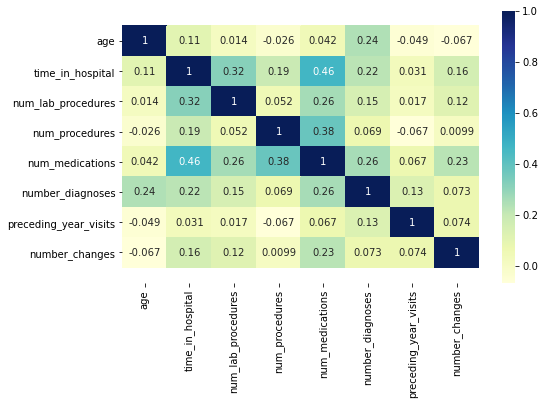

In [101]:
plt.figure(figsize=(8,5))
corr=df[num_cols].corr()
sns.heatmap(corr,annot=True,cmap='YlGnBu')
b,t=plt.ylim()
plt.ylim(b+0.5,t-0.5)
plt.show()

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(df[num_cols].values,i) for i in range(df[num_cols].shape[1])]
vif['feature']=df[num_cols].columns
vif=vif.sort_values('VIF',ascending=False)
vif

,VIF,feature
5,15.085635,number_diagnoses
0,12.141439,age
4,7.651632,num_medications
2,6.101781,num_lab_procedures
1,4.344960,time_in_hospital
3,1.926622,num_procedures
7,1.451683,number_changes
6,1.320692,preceding_year_visits


As it can be seen from correlation heatmap and vif values that there is no Multi-Collinearity in the numerical features.

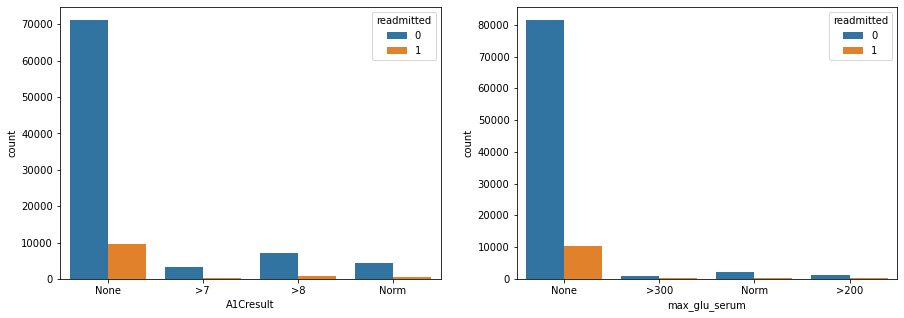

In [103]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax=ax.flatten()
j=0
for i in ['A1Cresult','max_glu_serum']:    
    sns.countplot(df[i],hue=df['readmitted'],ax=ax[j]) 
    j=j+1
plt.show()

We can see that majority of the readmitted patients didn’t get an A1C test and Max Glucose Serum Test.

# Outliers and Skewness

Box-Plots

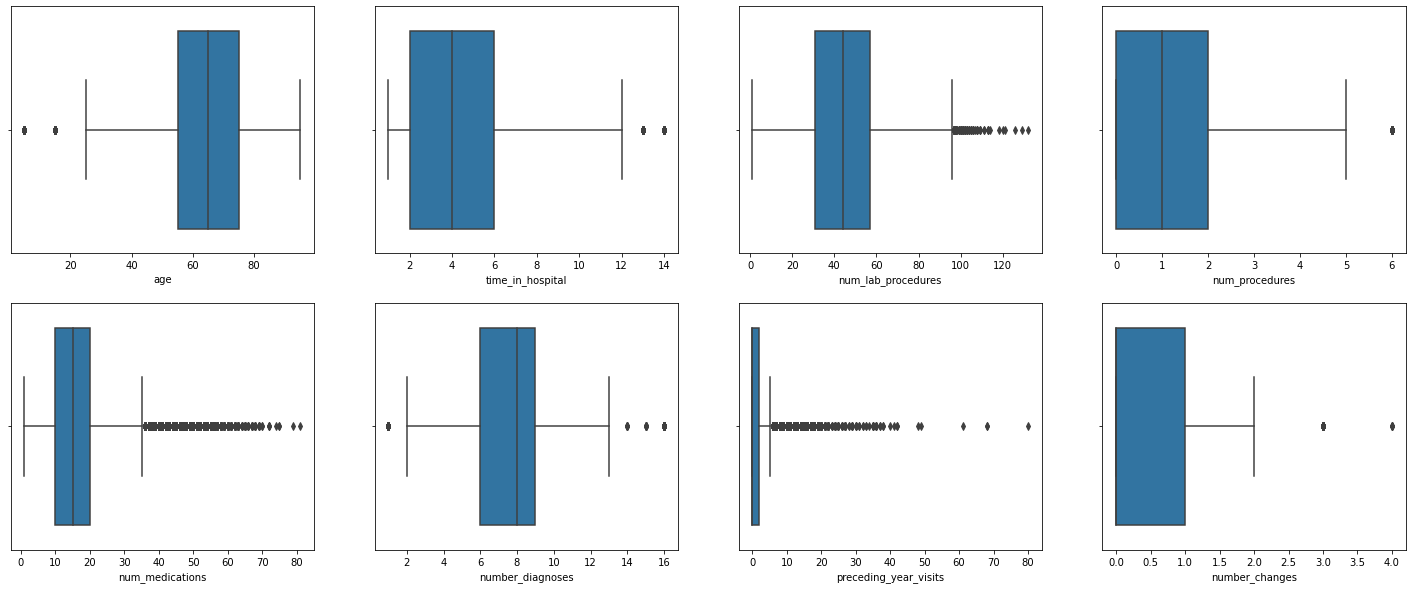

In [104]:
fig,ax=plt.subplots(2,4,figsize=(25,10))
ax=ax.flatten()
j=0
for i in num_cols:    
    sns.boxplot(df[i],ax=ax[j]) 
    j=j+1
plt.show()

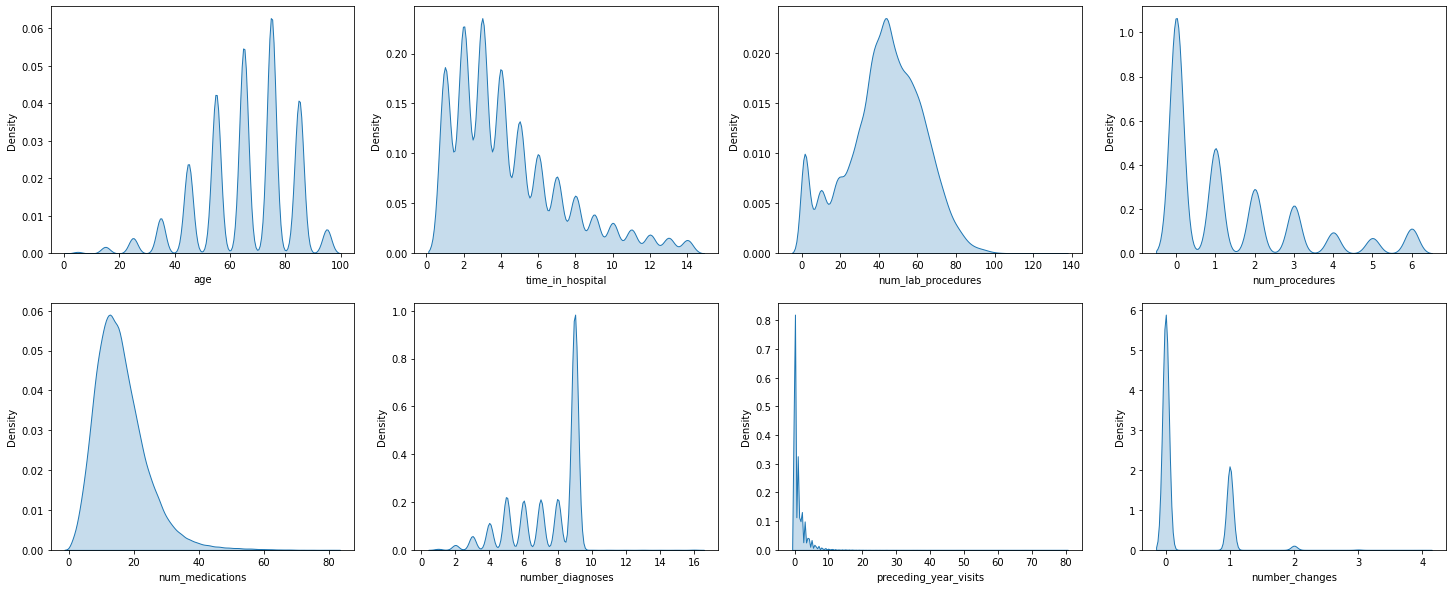

In [105]:
fig,ax=plt.subplots(2,4,figsize=(25,10))
ax=ax.flatten()
j=0
for i in num_cols:    
    sns.kdeplot(df[i],ax=ax[j],shade=True)
    plt.rc('legend', fontsize=15) 
    j=j+1
plt.show()

In [106]:
#Number of outliers
for i in num_cols:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1

    UL = q3 + (1.5 * iqr)
    LL = q1 - (1.5 * iqr)
    print(i,df[(df[i]>UL) | (df[i]<LL)].count()[i])
    #print(X[(X[i]>UL) | (X[i]<LL)][i])

age 840
time_in_hospital 2103
num_lab_procedures 119
num_procedures 4675
num_medications 2382
number_diagnoses 266
preceding_year_visits 4299
number_changes 111


The data is not normally distributed and has few outliers, so we use transformation.

In [107]:
pt = PowerTransformer(method = 'yeo-johnson')
df_new=df.copy()
df_new[num_cols]=pd.DataFrame(pt.fit_transform(df_new[num_cols]), columns = num_cols)
skew_df = pd.DataFrame({"Skew_Before" : df[num_cols].skew(), "Skew_After" : df_new[num_cols].skew()})
skew_df

,Skew_Before,Skew_After
age,-0.625265,-0.119083
time_in_hospital,1.141139,0.012974
num_lab_procedures,-0.239703,-0.230143
num_procedures,1.320396,0.207424
num_medications,1.331329,0.019316
number_diagnoses,-0.885529,-0.154843
preceding_year_visits,5.327782,0.409350
number_changes,1.425972,1.021220


# Scaling

In [108]:
mm=MinMaxScaler()
df_new[num_cols]=pd.DataFrame(mm.fit_transform(df_new[num_cols]), columns = num_cols)

In [109]:
df.to_csv('Diabetes_cleaned.csv', index = False)

# Modeling

In [110]:
df=pd.read_csv('Diabetes_cleaned.csv')
df.head()

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,diabetesMed,readmitted,preceding_year_visits,number_changes,insulin_treatment
0,Caucasian,0,5,Not Available,Referral,1,41,0,1,Diabetes,Not Required,Not Required,1,None,None,-2,-2,-2,-2,-2,-2,-2,-2,0,0,0,0.0,no_med
1,Caucasian,0,15,Discharged to home,Emergency,3,59,0,18,"Endocrine, Nutritional, Metabolic, Immunity",Diabetes,"Endocrine, Nutritional, Metabolic, Immunity",9,None,None,-2,-2,-2,-2,-2,-2,-2,1,1,0,0,1.0,insulin_only
2,AfricanAmerican,0,25,Discharged to home,Emergency,2,11,5,13,"Pregnancy, Childbirth",Diabetes,External causes of injury,6,None,None,-2,-2,-2,0,-2,-2,-2,-2,1,0,3,0.0,other_meds
3,Caucasian,1,35,Discharged to home,Emergency,2,44,1,16,Infectious and Parasitic,Diabetes,Circulatory,7,None,None,-2,-2,-2,-2,-2,-2,-2,1,1,0,0,1.0,insulin_only
4,Caucasian,1,45,Discharged to home,Emergency,1,51,0,8,Neoplasms,Neoplasms,Diabetes,5,None,None,-2,-2,-2,0,-2,-2,-2,0,1,0,0,0.0,insulin_combo


In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
  
import time
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint as sp_randint
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import scipy.stats as stats
from sklearn.metrics import recall_score, f1_score, confusion_matrix, classification_report, accuracy_score,precision_score, roc_auc_score

In [112]:
from xgboost import XGBClassifier

In [113]:
!pip3 install lightgbm

In [114]:
from lightgbm import LGBMClassifier

# Baseline Model

In [115]:
X = df.drop('readmitted', 1)
y = df['readmitted']

In [116]:
X_dum = pd.get_dummies(X, drop_first = True)
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size = 0.3, random_state = 0, stratify = y)
X_train.shape, X_test.shape

((67949, 95), (29121, 95))

In [117]:
X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
X_test.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]

In [118]:
from sklearn.metrics import recall_score, f1_score, confusion_matrix, classification_report, accuracy_score,precision_score, roc_auc_score

In [119]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 0, n_jobs = -1)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_train_prob = rf.predict_proba(X_train)[:, 1]
y_test_pred = rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:, 1]

print("Train Accuracy Score:", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred), '\n')
print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Train Precision Score:", precision_score(y_train, y_train_pred))
print("Train Recall Score:", recall_score(y_train, y_train_pred))
print("Train ROC_AUC Score:", roc_auc_score(y_train, y_train_prob))
print()
print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred), '\n')
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test Precision Score:", precision_score(y_test, y_test_pred))
print("Test Recall Score:", recall_score(y_test, y_test_pred))
print("Test ROC_AUC Score:", roc_auc_score(y_test, y_test_prob))

Train Accuracy Score: 0.9999411323198281
Train Confusion Matrix:
 [[60165     0]
 [    4  7780]] 

Train F1 Score: 0.9997429966589566
Train Precision Score: 1.0
Train Recall Score: 0.9994861253854059
Train ROC_AUC Score: 0.999999998932364

Test Accuracy Score: 0.8855465128257958
Test Confusion Matrix:
 [[25778     7]
 [ 3326    10]] 

Test F1 Score: 0.005964807634953773
Test Precision Score: 0.5882352941176471
Test Recall Score: 0.002997601918465228
Test ROC_AUC Score: 0.6344802982512187


It is clear that there is overfitting and recall is very low in test results. The main cause is the class imbalance present in our data.

In [120]:
pip install svm

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Arvind' is not recognized as an internal or external command,
operable program or batch file.


In [121]:
import time;

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [123]:
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder, OneHotEncoder

In [124]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import scipy.stats as stats

In [125]:
models = []

models.append(('LR', Pipeline([("Transformer", PowerTransformer()),
                               ("Scaler", StandardScaler()),
                              ("LogReg", LogisticRegression(random_state = 0, solver = 'liblinear'))])))
models.append(('DT', DecisionTreeClassifier(random_state = 0)))
models.append(('RF', RandomForestClassifier(random_state = 0, n_jobs = -1)))
models.append(('ADA',AdaBoostClassifier(random_state = 0)))
models.append(('XGB', XGBClassifier(random_state = 0, n_jobs = -1)))
models.append(('LGB',LGBMClassifier(random_state = 0, n_jobs = -1)))
#models.append(('SVC', Pipeline([("Transformer", PowerTransformer()),
#                                ("Scaler", StandardScaler()),
#                                ("SVC", SVC(random_state = 0, probability=True))])))



## Validation Set Scores
precision = []
recall = []
names = []
f1 = []
accuracy = []
roc_auc = []
Training_Time=[]
Prediction_Time=[]

for name, model in models:
    start_time = time.time()    
    model.fit(X_train, y_train)
    end_time = time.time()
    Training_Time.append(end_time - start_time)
    
    start_time = time.time()
    y_pred = model.predict(X_test)
    end_time = time.time()
    Prediction_Time.append(end_time-start_time)
    
    y_proba = model.predict_proba(X_test)[:, 1]
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
    accuracy.append(accuracy_score(y_test, y_pred))
    roc_auc.append(roc_auc_score(y_test, y_proba))
    names.append(name)
models_df = pd.DataFrame({'Model' : names, 'Precision' : precision, 'Recall' : recall,
                          'F1' : f1, 'Accuracy' : accuracy, 'ROC_AUC' : roc_auc,
                          'Training_Time':Training_Time,'Prediction_Time':Prediction_Time})
models_df

,Model,Precision,Recall,F1,Accuracy,ROC_AUC,Training_Time,Prediction_Time
0,LR,1.000000,0.000300,0.000599,0.885478,0.650394,10.445216,0.171888
1,DT,0.157147,0.172362,0.164403,0.799286,0.526379,2.104816,0.031252
2,RF,0.588235,0.002998,0.005965,0.885547,0.634480,11.619399,0.617060
3,ADA,0.500000,0.000600,0.001198,0.885443,0.656087,7.440469,0.763178
4,XGB,0.412281,0.014089,0.027246,0.884757,0.644734,18.245344,0.202718
5,LGB,0.750000,0.007194,0.014252,0.885993,0.662820,1.200830,0.205809


In [126]:
df['readmitted'].value_counts(1)*100

0    88.544349
1    11.455651
Name: readmitted, dtype: float64

The Imbalance Ratio of our dataset was 1: 8. This may lead to treating features of the minority class as noise. Thus, there is a high probability of misclassification of the minority class as compared to the majority class. Keeping in mind the disadvantages of oversampling and undersampling techniques, we have used cost sensitive algorithms to deal with class imbalance

# With Class Weights

In [127]:
models = []

models.append(('LR', Pipeline([("Transformer", PowerTransformer()),
                               ("Scaler", StandardScaler()),
                               ("LogReg", LogisticRegression(random_state = 0, solver = 'liblinear', n_jobs = -1,class_weight='balanced'))])))
models.append(('DT', DecisionTreeClassifier(random_state = 0,class_weight='balanced')))
models.append(('RF', RandomForestClassifier(random_state = 0, n_jobs = -1,class_weight ='balanced_subsample')))
models.append(('XGB', XGBClassifier(random_state = 0, n_jobs = -1,scale_pos_weight=7.72)))
models.append(('LGB',LGBMClassifier(random_state = 0, n_jobs = -1,class_weight ='balanced')))
#models.append(('SVC', Pipeline([("Transformer", PowerTransformer()),
#                               ("Scaler", StandardScaler()),
#                               ("SVM", SVC(random_state = 0,class_weight='balanced', probability=True)))])))


## Validation Set Scores
precision = []
recall = []
names = []
f1 = []
accuracy = []
roc_auc = []
Training_Time=[]
Prediction_Time=[]

for name, model in models:
    start_time = time.time()    
    model.fit(X_train, y_train)
    end_time = time.time()
    Training_Time.append(end_time - start_time)
    
    start_time = time.time()
    y_pred = model.predict(X_test)
    end_time = time.time()
    Prediction_Time.append(end_time-start_time)
    
    y_proba = model.predict_proba(X_test)[:, 1]
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
    accuracy.append(accuracy_score(y_test, y_pred))
    roc_auc.append(roc_auc_score(y_test, y_proba))
    names.append(name)
models_df = pd.DataFrame({'Model' : names, 'Precision' : precision, 'Recall' : recall,
                          'F1' : f1, 'Accuracy' : accuracy, 'ROC_AUC' : roc_auc,
                          'Training_Time':Training_Time,'Prediction_Time':Prediction_Time})
models_df

,Model,Precision,Recall,F1,Accuracy,ROC_AUC,Training_Time,Prediction_Time
0,LR,0.169277,0.612410,0.265239,0.611311,0.651578,9.811963,0.171839
1,DT,0.157309,0.178058,0.167042,0.796573,0.527326,1.995240,0.046890
2,RF,0.714286,0.002998,0.005970,0.885650,0.628691,11.528068,0.499969
3,XGB,0.172072,0.478717,0.253151,0.676419,0.631682,15.696156,0.156695
4,LGB,0.175615,0.582434,0.269861,0.638955,0.661044,1.210062,0.182198


After using the class weights the recall have increased significantly. The best three models are LGB. We will tune the hyperparameters of this models.

In [128]:
model = LGBMClassifier(objective = 'binary', random_state = 0, n_jobs = -1, is_unbalance = True)

params = {'boosting_type' : ['gbdt', 'dart', 'goss', 'rf'],
          'num_leaves' : np.arange(15, 60),
          'max_depth' : np.arange(75, 300),
          'learning_rate' : np.linspace(0.007, 0.7, 25),
          'n_estimators' : np.arange(40, 160),
          'min_child_samples' : np.arange(9, 36)}

rsearch = RandomizedSearchCV(model, params, n_iter = 100, scoring = 'roc_auc', n_jobs = -1,
                             cv = 10, verbose = 1, random_state = 0)
rsearch.fit(X_train, y_train)

OverflowError: Python int too large to convert to C long

In [129]:
model = LGBMClassifier(objective = 'binary', random_state = 0, n_jobs = -1, is_unbalance = True,
                       boosting_type = 'gbdt', learning_rate = 0.06475, max_depth = 178,
                       min_child_samples = 22, n_estimators = 128, num_leaves = 23)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
print("Training Time:", end_time - start_time)
y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)[:, 1]
start_time = time.time()
y_test_pred = model.predict(X_test)
end_time = time.time()
print("Prediction Time:", end_time - start_time)
y_test_prob = model.predict_proba(X_test)[:, 1]
print("Train Accuracy Score:", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred), '\n')
print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Train Precision Score:", precision_score(y_train, y_train_pred))
print("Train Recall Score:", recall_score(y_train, y_train_pred))
print("Train ROC_AUC Score:", roc_auc_score(y_train, y_train_prob))
print()
print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred), '\n')
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test Precision Score:", precision_score(y_test, y_test_pred))
print("Test Recall Score:", recall_score(y_test, y_test_pred))
print("Test ROC_AUC Score:", roc_auc_score(y_test, y_test_prob))

Training Time: 1.10170316696167
Prediction Time: 0.18748688697814941
Train Accuracy Score: 0.6396414958277532
Train Confusion Matrix:
 [[38071 22094]
 [ 2392  5392]] 

Train F1 Score: 0.30575559965976756
Train Precision Score: 0.19617259695845157
Train Recall Score: 0.6927029804727647
Train ROC_AUC Score: 0.7283908400579462

Test Accuracy Score: 0.6266611723498506
Test Confusion Matrix:
 [[16215  9570]
 [ 1302  2034]] 

Test F1 Score: 0.27228915662650605
Test Precision Score: 0.1752843846949328
Test Recall Score: 0.6097122302158273
Test ROC_AUC Score: 0.6633169787613771


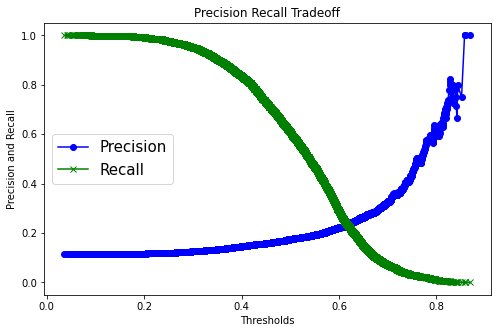

In [130]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize = (8, 5))
prec, rec, thresh = precision_recall_curve(y_test, y_test_prob)
plt.plot(thresh, prec[1:], marker = 'o', c = 'b', label = 'Precision')
plt.plot(thresh, rec[1:], marker = 'x', c = 'g', label = 'Recall')
plt.legend(loc = 'center left')
plt.xlabel("Thresholds")
plt.ylabel('Precision and Recall')
plt.title('Precision Recall Tradeoff')
plt.show()

As we increase the Recall, the precision decreases which means that if we want to reduce the number of False Negatives our False Positives will increase.

In [131]:
acc = []
f1 = []
prec = []
rec = []
thresh = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85]
for i in thresh:
    pred = (y_test_prob >= i).astype(bool)
    f1.append(f1_score(y_test, pred))
    acc.append(accuracy_score(y_test, pred))
    prec.append(precision_score(y_test, pred))
    rec.append(recall_score(y_test, pred))
res = pd.DataFrame({"Thresholds" : thresh, "Accuracy" : acc, "F1" : f1, "Precision" : prec, "Recall" : rec})
res

,Thresholds,Accuracy,F1,Precision,Recall
0,0.10,0.116926,0.205904,0.114776,0.999400
1,0.15,0.122832,0.206757,0.115326,0.997902
2,0.20,0.140174,0.209103,0.116866,0.992206
3,0.25,0.174960,0.213243,0.119697,0.976019
4,0.30,0.235225,0.221865,0.125569,0.951739
5,0.35,0.317056,0.232361,0.133351,0.902278
6,0.40,0.421036,0.248395,0.145894,0.835132
7,0.45,0.523849,0.259769,0.158028,0.729317
8,0.50,0.626661,0.272289,0.175284,0.609712
9,0.55,0.713780,0.272370,0.192142,0.467626


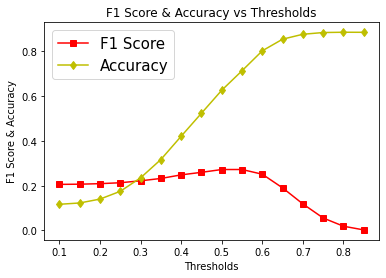

In [132]:
plt.plot(thresh, f1, marker = 's', c = 'r', label = 'F1 Score')
plt.plot(thresh, acc, marker = 'd', c = 'y', label = 'Accuracy')
plt.xlabel('Thresholds')
plt.ylabel('F1 Score & Accuracy')
plt.title('F1 Score & Accuracy vs Thresholds')
plt.legend(loc = 'best')
plt.show()

Best Threshold=0.498919, G-Mean=0.620


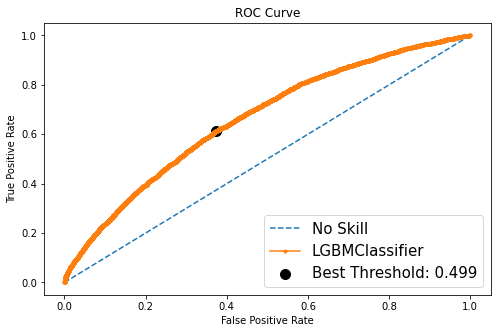

In [133]:
from sklearn.metrics import roc_curve
plt.figure(figsize = (8, 5))
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='LGBMClassifier')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', alpha = 1, edgecolors = 'k', s = 100,
            label='Best Threshold: '+str(round(thresholds[ix], 3)))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.legend(loc = 'best')
# show the plot
plt.show()

In [134]:
y_train_pred = (y_train_prob >= 0.487).astype(bool)
y_test_pred = (y_test_prob >= 0.487).astype(bool)
print("Train Accuracy Score:", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred), '\n')
print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Train Precision Score:", precision_score(y_train, y_train_pred))
print("Train Recall Score:", recall_score(y_train, y_train_pred))
print("Train ROC_AUC Score:", roc_auc_score(y_train, y_train_prob))
print()
print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred), '\n')
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test Precision Score:", precision_score(y_test, y_test_pred))
print("Test Recall Score:", recall_score(y_test, y_test_pred))
print("Test ROC_AUC Score:", roc_auc_score(y_test, y_test_prob))

Train Accuracy Score: 0.6150200885958587
Train Confusion Matrix:
 [[36156 24009]
 [ 2150  5634]] 

Train F1 Score: 0.3010660752932375
Train Precision Score: 0.19006173464224269
Train Recall Score: 0.723792394655704
Train ROC_AUC Score: 0.7283908400579462

Test Accuracy Score: 0.598605817107929
Test Confusion Matrix:
 [[15296 10489]
 [ 1200  2136]] 

Test F1 Score: 0.2676524027316584
Test Precision Score: 0.1691881188118812
Test Recall Score: 0.6402877697841727
Test ROC_AUC Score: 0.6633169787613771


# SHAP

In [136]:
!pip install shap

  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9


In [137]:
import shap
explainer = shap.TreeExplainer(model, data=X_train)
shap_values = explainer.shap_values(X_test)
pd.DataFrame(shap_values).head()

 99%|===================| 28898/29121 [01:47<00:00]        

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94
0,-0.012312,0.071096,0.063750,0.025886,-0.004228,-0.032323,-0.029881,0.023245,0.0,0.005288,0.000661,-0.000119,-0.004604,0.001514,-0.001030,0.021310,-0.263810,-0.008897,0.0,-0.024131,0.000051,0.000000,-0.005082,-0.001225,-0.023032,0.0,-0.201863,0.010830,-0.006188,0.006800,-0.040506,0.0,-0.010744,0.000005,-0.000264,0.001324,0.003341,0.000000,-0.000128,0.002115,-0.245621,0.00000,-0.000313,-0.000057,-0.000400,0.010437,0.0,0.001603,0.023739,0.000000,-0.002558,0.0,0.000209,0.001056,0.000486,-0.000647,0.000138,0.003096,-0.01439,-0.008774,0.000234,0.0,-0.000133,0.0,0.006025,0.0,-0.001740,-0.001057,-0.002228,-0.000040,-0.002011,0.003635,-0.168559,-0.001185,0.00000,0.0,0.000000,0.0,-0.002998,-0.000405,0.002600,0.000054,0.0,-0.000126,0.0,0.000000,0.0,0.017329,-0.002135,0.000755,0.012857,0.002237,-0.025491,0.0,-0.004603
1,-0.012012,-0.092860,0.004778,0.000147,0.031736,-0.028354,-0.057536,0.027002,0.0,0.004431,0.000188,-0.000419,0.006060,0.002180,-0.007294,0.015816,0.140105,-0.003658,0.0,-0.004051,0.000127,-0.000148,-0.016769,-0.002958,0.001710,0.0,-0.146437,0.005165,0.000709,-0.098001,-0.025120,0.0,-0.012633,0.000021,-0.000155,-0.003297,0.002799,0.001387,-0.000026,-0.000421,0.013915,0.00000,0.000000,0.002171,-0.003101,-0.171267,0.0,0.002141,-0.005153,0.000000,-0.006182,0.0,-0.004995,-0.000316,0.000672,-0.000466,0.000138,0.002366,0.00000,-0.009923,0.000449,0.0,0.000881,0.0,0.008789,0.0,-0.000985,-0.002366,0.000365,-0.007305,-0.001886,0.000732,0.017793,-0.001353,0.00000,0.0,0.000000,0.0,-0.002859,-0.000347,0.003617,-0.001481,0.0,-0.007463,0.0,0.000000,0.0,0.003137,-0.003391,0.001273,0.015019,0.001850,0.070225,0.0,-0.000168
2,-0.007661,-0.019694,-0.008822,0.002896,0.020177,-0.047281,0.032479,0.015530,0.0,0.013239,0.000633,0.004495,-0.000195,0.003101,0.000158,-0.032039,0.450588,0.005549,0.0,-0.002130,0.000160,0.000000,-0.006753,-0.001460,-0.000721,0.0,-0.082715,0.010587,-0.003461,0.004676,-0.017583,0.0,0.078170,0.000045,-0.000419,-0.003647,0.003061,0.001300,-0.000175,-0.000447,0.005065,0.00000,0.000000,-0.000743,-0.001278,0.013618,0.0,0.001033,-0.000830,0.000000,-0.004092,0.0,0.050211,-0.000126,0.000594,-0.000521,0.000552,-0.000765,0.00000,-0.008814,0.001494,0.0,0.000881,0.0,0.002180,0.0,-0.000904,-0.000143,0.001675,0.000557,0.082470,0.001494,0.012599,-0.001259,0.00000,0.0,0.000075,0.0,-0.004273,-0.000355,0.000022,0.000108,0.0,-0.004557,0.0,0.000086,0.0,0.003228,0.001425,0.001240,0.020211,0.002151,-0.045349,0.0,-0.000716
3,0.005172,0.018569,0.054252,-0.158696,-0.149307,-0.363867,0.033909,0.030829,0.0,0.003780,0.000374,-0.007510,-0.000512,-0.013525,-0.007946,0.009772,0.008847,0.031960,0.0,-0.001952,0.000051,0.000000,-0.012591,-0.004206,-0.021151,0.0,-0.135603,0.025826,-0.023579,0.003155,-0.008029,0.0,-0.008009,0.004775,-0.000152,-0.002456,-0.001353,0.000000,-0.000157,-0.000715,0.011624,0.00000,0.000000,0.000329,-0.001197,0.021781,0.0,0.000574,0.012110,0.000171,-0.006523,0.0,-0.000530,-0.000316,0.000933,-0.000167,0.000069,-0.001820,0.00000,-0.003529,0.003195,0.0,0.000268,0.0,0.004645,0.0,-0.002756,-0.028844,0.001863,-0.001559,-0.003917,0.001021,0.014362,-0.005468,0.00000,0.0,-0.000003,0.0,-0.003835,0.000157,0.000093,0.001666,0.0,-0.004201,0.0,0.000100,0.0,0.002727,-0.000692,0.001104,-0.002197,0.002574,-0.057572,0.0,-0.000454
4,0.004519,-0.105162,0.042657,0.022582,0.003849,0.036144,-0.029926,0.000686,0.0,0.000676,0.000324,-0.006394,-0.000091,0.002495,0.012041,0.017308,0.001792,-0.015509,0.0,0.000100,0.000025,0.000000,-0.004889,0.000596,-0.011885,0.0,0.282344,-0.009688,0.010560,0.005659,-0.008551,0.0,-0.001597,0.000968,0.000215,-0.005411,0.004470,0.000000,-0.005729,-0.001050,0.004581,0.01921,0.000000,-0.000930,-0.001033,0.006860,0.0,0.000724,-0.000603,0.000000,-0.004395,0.0,-

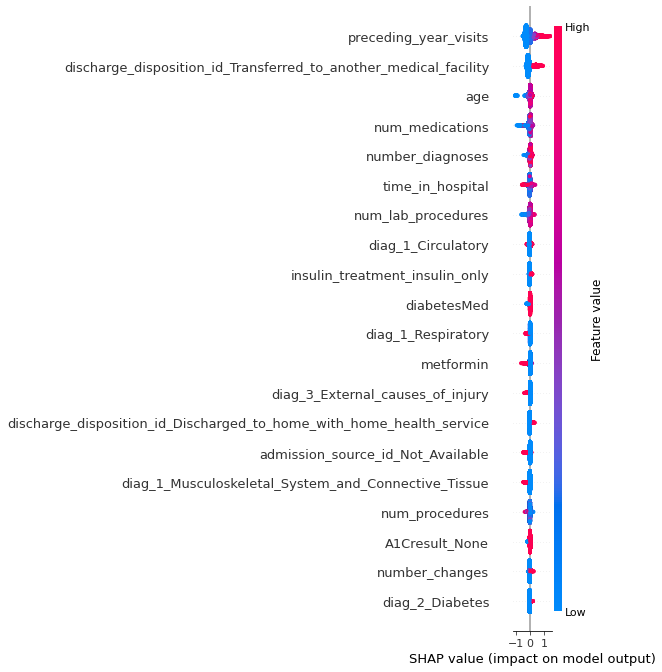

In [138]:
shap.summary_plot(shap_values, X_test)